# Projeto 2 - Ciência dos Dados

Nome: Eduardo Janes Vescovi <br />
Nome: Fabio Dotoli Ferreira Filho <br />
Nome: José Rafael Martins Fernandes <br />
Nome: Lucca Barufatti Velini Sanches

## Proposta do projeto:

O "Car Evaluation Data Set", disponível em https://archive.ics.uci.edu/ml/datasets/Car+Evaluation, consiste em um dataset que apresenta características de diversos carros disponíveis no mercado. Estão presentes o número de portas, o tamanho do porta-malas, o valor de manutenção, o nível de segurança do carro e o valor do carro. A ideia do projeto é usar métodos de classificação para prever a aceitação da oferta desse veículo no mercado, baseado nesses outros atributos. Para isso, foram escolhidos os métodos de classificação "Regressão Logística" e "Árvore de Classificação". Além disso, a biblioteca scikit-learn, do python, para realizar as classificações e mostrar os resultados.

### Carregando algumas bibliotecas:

In [176]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import sklearn.tree
from math import *
from IPython.display import display
pd.options.display.max_rows = 13

### Localizando o arquivo

In [177]:
filename = 'car.data'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo car.data, tudo certo para prosseguir com o projeto!


### Carregando o arquivo

In [178]:
nomes_colunas = ['Buying', 'Maint', 'Doors', 'Capacity', 'Lug_boot', 'Safety', 'Car_acceptability']
cars = pd.read_csv(filename, names=nomes_colunas)
cars

,Buying,Maint,Doors,Capacity,Lug_boot,Safety,Car_acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Análise Exploratória Inicial

In [179]:
#Colunas do dataset
buying = cars.Buying
maint = cars.Maint
doors = cars.Doors
capacity = cars.Capacity
lug_boot = cars.Lug_boot
safety = cars.Safety
car_acceptability = cars.Car_acceptability

In [180]:
#Função para fazer analise exploratoria inicial por coluna 

def analise_exploratoria(coluna):
    display(coluna.value_counts()) 
    display(coluna.value_counts(True))

    plt.figure(figsize=(5, 5))

    plt.hist(coluna, density = True)
    plt.xlabel(coluna.name)
    plt.ylabel('Density')
    plt.show()

vhigh    432
high     432
med      432
low      432
Name: Buying, dtype: int64

vhigh    0.25
high     0.25
med      0.25
low      0.25
Name: Buying, dtype: float64

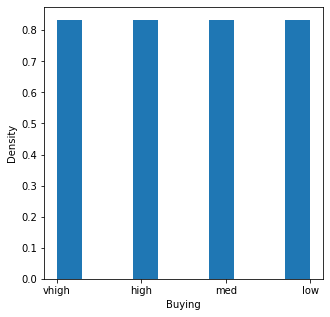

In [181]:
#Buying
analise_exploratoria(buying)

vhigh    432
high     432
med      432
low      432
Name: Maint, dtype: int64

vhigh    0.25
high     0.25
med      0.25
low      0.25
Name: Maint, dtype: float64

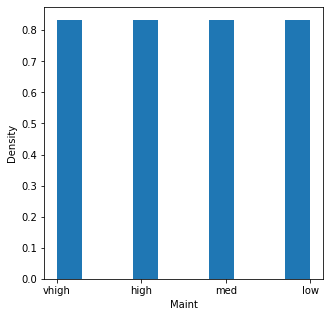

In [182]:
#Maint
analise_exploratoria(maint)

5more    432
3        432
2        432
4        432
Name: Doors, dtype: int64

5more    0.25
3        0.25
2        0.25
4        0.25
Name: Doors, dtype: float64

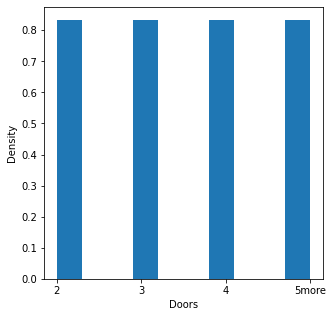

In [183]:
#Doors
analise_exploratoria(doors)

more    576
2       576
4       576
Name: Capacity, dtype: int64

more    0.333333
2       0.333333
4       0.333333
Name: Capacity, dtype: float64

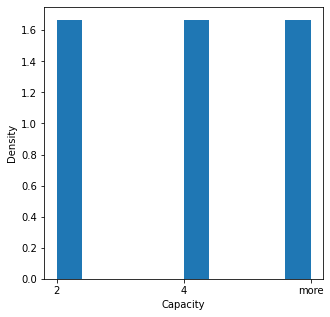

In [184]:
#Capacity
analise_exploratoria(capacity)

small    576
med      576
big      576
Name: Lug_boot, dtype: int64

small    0.333333
med      0.333333
big      0.333333
Name: Lug_boot, dtype: float64

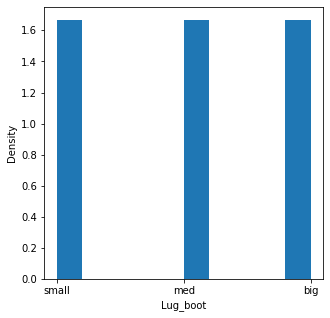

In [185]:
#Lug_boot
analise_exploratoria(lug_boot)

high    576
med     576
low     576
Name: Safety, dtype: int64

high    0.333333
med     0.333333
low     0.333333
Name: Safety, dtype: float64

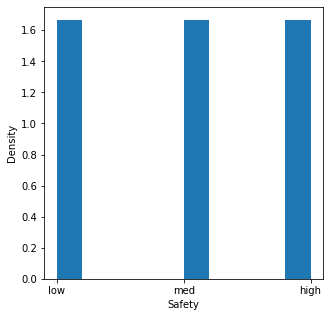

In [186]:
#Safety
analise_exploratoria(safety)

unacc    1210
acc       384
good       69
vgood      65
Name: Car_acceptability, dtype: int64

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: Car_acceptability, dtype: float64

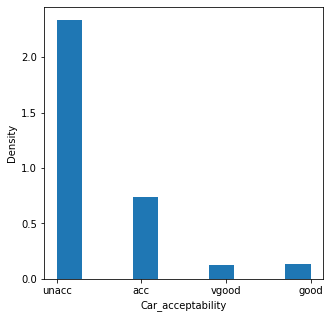

In [187]:
#Car_acceptability
analise_exploratoria(car_acceptability)

### Iniciando classificação

In [188]:
#Substituindo dados categoricos por valores ordinais
buying_maint_dici = {'vhigh': '4', 'high': '3', 'med': '2', 'low': '1'}
doors_dici = {'2':'2', '3':'3', '4':'4','5more': '5'}
capacity_dici = {'2':'2', '4':'4', 'more': '3'}
lug_boot_dici = {'small': '1', 'med': '2', 'big': '3'}
safety_dici = {'low': '1', 'med': '2', 'high': '3'}
car_acceptability_dici = {'unacc':'1', 'acc':'2', 'good':'3', 'vgood':'4'}

cars['Buying'].replace(buying_maint_dici, inplace=True)
cars['Maint'].replace(buying_maint_dici, inplace=True)
cars['Doors'].replace(doors_dici, inplace=True)
cars['Capacity'].replace(capacity_dici, inplace=True)
cars['Lug_boot'].replace(lug_boot_dici, inplace=True)
cars['Safety'].replace(safety_dici, inplace=True)
cars['Car_acceptability'].replace(car_acceptability_dici, inplace=True)

cars = cars.apply(pd.to_numeric)

In [189]:
variaveis_independentes = ['Buying', 'Maint', 'Doors', 'Capacity', 'Lug_boot', 'Safety']
x = cars[variaveis_independentes] 
y = car_acceptability

In [190]:
#Dividindo o dataset em treino e teste
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=0)

In [191]:
#Funções para ver resultados

def resultados(y_test, y_pre):
    resultados = sklearn.metrics.classification_report(y_test, y_pre, output_dict=True)
    df_result = pd.DataFrame(resultados).T
    df_result['support'] = df_result['support'].apply(int)
    df_result = df_result.rename(index={'1':'unacc', '2':'acc', '3':'good', '4':'vgood'})
    display(df_result)
    
def matriz_confusao(modelo, x_test, y_test, nome):
    print('---Legenda:---')
    print('1 = unacc')
    print('2 = acc')
    print('3 = good')
    print('4 = vgood')
    sklearn.metrics.plot_confusion_matrix(modelo, x_test, y_test)
    plt.title('Matriz de Confusão {}'.format(nome))
    plt.show()


### Classificação usando Regressão Logísitica 

Regressão logística é um algoritmo de classificação. A técnica é muito utilizada para prever variáveis binárias (1 ou 0), mas também pode ser aplicada para problemas multinominais ou ordinais. Um exemplo clássico é um cenário em que, baseado na saúde da pessoa, o algoritmo deve prever se ela desenvolverá câncer ou não.  A técnica tem muitas vantagens perante a regressão linear, principalmente no que diz respeito à normalidade e linearidade. Dessa maneira, nota-se que não há, por exemplo, a necessidade da relação linear entre variável resposta e variáveis explicativas. Além disso, os resíduos não precisam estar normalmente distribuídos. A regressão logística pode ser equacionada da seguinte forma:

<img src='Img/regressao_logistica.jpeg' width=200>

In [192]:
#Fazendo a classificação
modelo_rl = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter=10000) #Criando modelo de regressão logística
modelo_rl.fit(x_train,y_train) #Treinando modelo
y_pre_rl = modelo_rl.predict(x_test) #Fazendo a predição

In [193]:
#Resultados da predição
print('----Resultados da Regressão Logística----')
resultados(y_test, y_pre_rl)

----Resultados da Regressão Logística----


,precision,recall,f1-score,support
unacc,0.873418,0.932432,0.901961,296
acc,0.714286,0.606061,0.655738,99
good,0.562500,0.428571,0.486486,21
vgood,0.750000,0.750000,0.750000,16
accuracy,0.826389,0.826389,0.826389,0
macro avg,0.725051,0.679266,0.698546,432
weighted avg,0.817265,0.826389,0.819710,432


---Legenda:---
1 = unacc
2 = acc
3 = good
4 = vgood


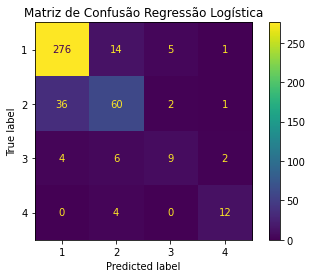

In [194]:
#Matriz de confusão
nome = 'Regressão Logística'
matriz_confusao(modelo_rl, x_test, y_test, nome)

### Classificação usando Decision Tree

Na classificação usando o Modelo de Predição Decision Tree, realizamos uma analogia à uma árvore, na qual cada ramo representa uma classificação binária 

In [195]:
#Fazendo a classificação
modelo_dt = sklearn.tree.DecisionTreeClassifier() #Criando modelo decision Tree
modelo_dt.fit(x_train,y_train) #Treinando modelo
y_pre_dt = modelo_dt.predict(x_test) #Fazendo a predição

In [196]:
print('----------Resultados Decision Tree----------')
resultados(y_test, y_pre_dt)

----------Resultados Decision Tree----------


,precision,recall,f1-score,support
unacc,0.980066,0.996622,0.988275,296
acc,0.978022,0.898990,0.936842,99
good,0.840000,1.000000,0.913043,21
vgood,1.000000,0.937500,0.967742,16
accuracy,0.972222,0.972222,0.972222,0
macro avg,0.949522,0.958278,0.951476,432
weighted avg,0.973527,0.972222,0.972071,432


---Legenda:---
1 = unacc
2 = acc
3 = good
4 = vgood


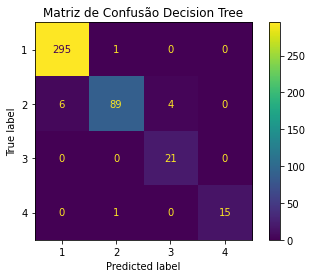

In [197]:
#Matriz de confusão
nome = 'Decision Tree'
matriz_confusao(modelo_dt, x_test, y_test, nome)

### Conclusão

Escrever a Conclusão

### Referências

- https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python <br />
- https://estatsite.com.br/2020/09/23/regressao-logistica-em-python/ <br />
- https://matheusfacure.github.io/2017/02/25/regr-log/ <br />
- https://www.datasciencecentral.com/profiles/blogs/alternatives-to-logistic-regression <br />
- https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-está-funcionando-mesmo-a5892f6468b <br />
- https://mljar.com/blog/visualize-decision-tree/ <br />
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python <br />